In [51]:
from os import listdir
import os
import numpy as np
import operator

In [52]:
folders_path = ['Large_Cap','Mid_Cap','Small_Cap']
file_path = []
names = []
for folder_path in folders_path:
    j = 0
    l = os.listdir(folder_path)
#     print(l)
    for i in l:
        j+=1
        if j<=10:
            file_path.append(folder_path + "/" + i)
            names.append(os.path.splitext(i)[0])
        else:
            break

In [53]:
import pandas as pd

li = []

for filename in file_path:
    df = pd.read_csv(filename)
    li.append(df)

for i,q in enumerate(li):
    li[i] = li[i][li[i].Series == 'EQ']
    
frame = pd.concat(li, axis=0, ignore_index=True)

In [54]:
frame = frame[['Symbol','Close Price']]

In [55]:
prices = {}
for name in names:
    for ind, row in frame.iterrows():
        if set(frame.loc[ind,'Symbol']) == set(name):
            key = name
            prices.setdefault(key, [])
            prices[key].append(frame.loc[ind,'Close Price'])


In [56]:
# DataFrame(dict([ (k,Series(v)) for k,v in prices.items() ]))

In [57]:
df = pd.DataFrame.from_dict(prices, orient='index')
df = df.transpose()

In [58]:
df.dropna(0, inplace = True)

In [59]:
df

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL,CIPLA,DRREDDY,EICHERMOT,GAIL,HDFC,...,ASHOKA,BAJAJELEC,BOMDYEING,CENTURYPLY,FORTIS,GUJALKALI,IDFC,IRCON,ITDC,JETAIRWAYS
0,356.20,1148.05,500.10,1332.95,727.85,569.00,2675.80,28930.60,414.00,1559.50,...,216.05,341.15,82.20,266.65,205.25,457.35,63.70,415.30,650.15,527.50
1,354.50,1142.85,501.50,1347.75,733.30,565.60,2724.10,29362.50,411.40,1566.55,...,214.90,347.00,83.40,266.10,207.90,455.25,64.25,427.00,636.70,534.15
2,348.55,1154.95,502.80,1324.80,727.45,562.35,2736.90,29093.55,408.30,1552.50,...,217.00,349.85,82.25,264.85,205.90,472.65,63.35,421.40,626.75,528.90
3,347.90,1151.35,492.00,1314.55,714.90,560.10,2678.95,28357.30,404.75,1537.05,...,209.65,334.10,78.95,260.35,196.85,461.85,61.50,407.10,604.65,522.70
4,349.45,1123.15,501.70,1289.15,702.45,564.95,2656.45,27936.05,401.05,1520.60,...,206.25,336.20,77.15,254.05,203.55,455.35,61.15,399.80,594.30,520.40
5,354.45,1112.55,502.30,1242.15,695.60,563.10,2608.70,27189.90,390.20,1519.85,...,201.60,313.25,74.00,255.50,194.80,455.25,60.20,382.05,574.65,475.65
6,331.65,1098.90,500.60,1233.75,699.55,533.20,2579.45,27598.25,380.35,1511.50,...,197.65,315.55,70.45,247.95,196.55,435.15,58.25,363.65,553.80,472.85
7,339.65,1091.20,499.30,1224.35,711.90,519.65,2516.80,27364.70,390.65,1524.85,...,196.00,327.95,66.95,241.05,194.35,440.50,56.90,365.05,516.15,464.80
8,340.75,1113.20,507.45,1258.85,726.85,504.00,2427.70,28009.45,401.00,1539.75,...,199.55,346.20,69.85,252.65,202.55,443.15,57.60,360.95,508.15,468.95
9,348.00,1132.45,511.45,1317.80,749.65,488.90,2414.40,28351.35,401.75,1547.90,...,199.90,359.45,73.00,259.65,202.75,426.20,59.25,368.00,511.05,483.40


In [61]:
from math import sqrt

returns = df.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = df.pct_change().std()*sqrt(252)
returns

,Returns,Volatility
ADANIPORTS,0.248830,0.263183
ASIANPAINT,0.001428,0.188060
AXISBANK,0.191072,0.266435
BAJFINANCE,0.509863,0.303276
BPCL,-0.390129,0.506139
CIPLA,0.102239,0.271144
DRREDDY,-0.135267,0.321768
EICHERMOT,0.081510,0.227154
GAIL,0.343332,0.284225
HDFC,0.180418,0.179343


In [62]:
data = np.asarray([np.asarray(returns['Returns']), np.asarray(returns['Volatility'])]).T
clean_data = np.where(np.isnan(data), 0, data)
clean_data

array([[ 2.48829532e-01,  2.63183369e-01],
       [ 1.42809802e-03,  1.88059874e-01],
       [ 1.91071981e-01,  2.66435370e-01],
       [ 5.09863280e-01,  3.03276369e-01],
       [-3.90129216e-01,  5.06138905e-01],
       [ 1.02239344e-01,  2.71143747e-01],
       [-1.35266899e-01,  3.21767647e-01],
       [ 8.15103701e-02,  2.27153927e-01],
       [ 3.43332338e-01,  2.84225181e-01],
       [ 1.80418181e-01,  1.79343074e-01],
       [ 3.79544707e-01,  4.62123162e-01],
       [-1.63655267e-01,  3.11094741e-01],
       [-2.83705520e-01,  2.52704153e-01],
       [ 2.09445919e-01,  3.16538101e-01],
       [-1.06439491e-02,  2.66042201e-01],
       [-8.86390016e-02,  1.86602989e-01],
       [-3.45148586e-01,  2.58605010e-01],
       [ 6.27975196e-01,  3.65581727e-01],
       [-2.53851561e-01,  2.44891204e-01],
       [ 1.03647321e-01,  5.28960703e-01],
       [ 2.47757117e-01,  3.61508644e-01],
       [ 6.46188568e-01,  4.09395906e-01],
       [ 2.27821717e+00,  6.49822545e-01],
       [ 4.

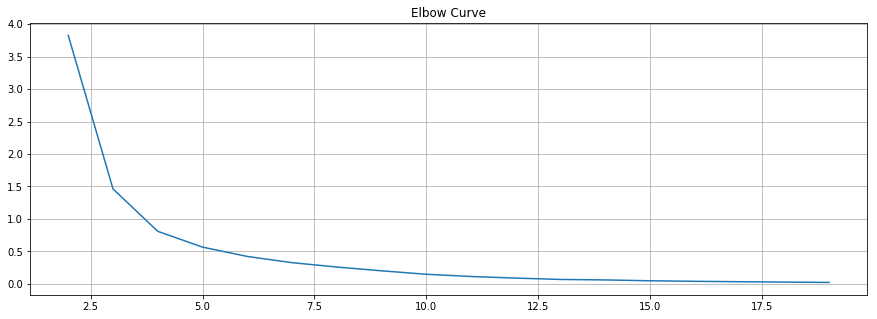

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = clean_data

wcss = []
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    
# plt.rcParams['figure.figsize'] = (14,7)
fig = plt.figure(figsize = (15,5))

plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow Curve')
plt.show()

In [67]:
from scipy.cluster.vq import kmeans,vq
centroids,_ = kmeans(clean_data, 5)
idx,_ = vq(clean_data, centroids)

data = clean_data

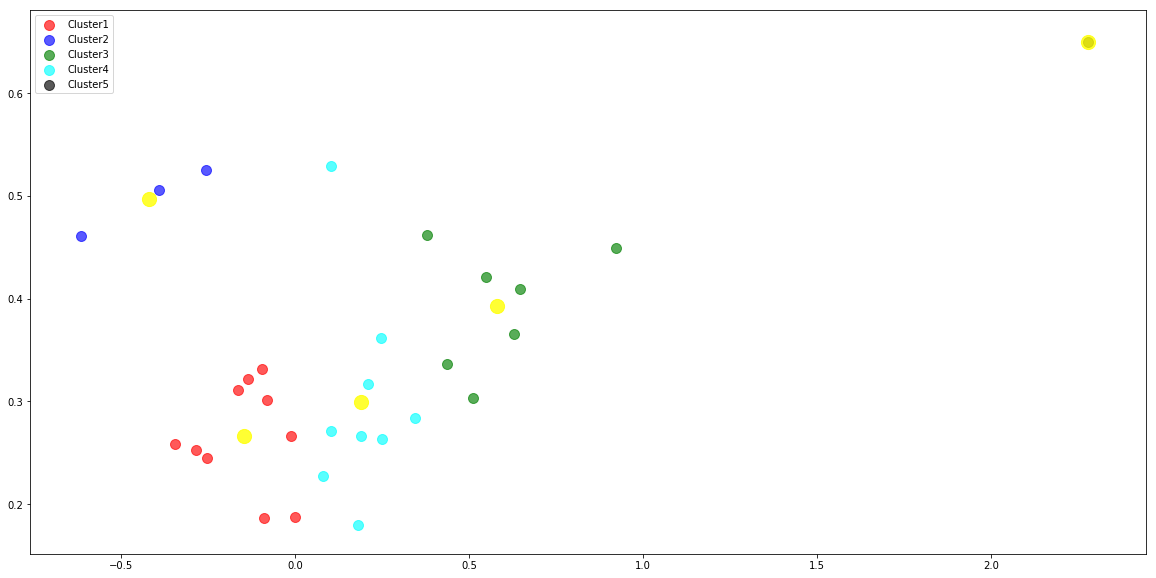

In [71]:
from matplotlib.pyplot import figure
figure(figsize=(20,10))

plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)

plt.scatter(centroids[:,0], centroids[:,1], s=200, c='yellow', alpha = 0.8)
plt.legend()
plt.show()

In [69]:
details = [(name,cluster) for name, cluster in zip(returns.index, idx)]

In [70]:
labels = ['Stock Symbol', 'Cluster']
df = pd.DataFrame.from_records(details, columns = labels)
df.Cluster = df.Cluster+1
df.sort_values('Cluster')

,Stock Symbol,Cluster
14,BERGEPAINT,1
12,AMARAJABAT,1
11,AJANTPHARM,1
18,EXIDEIND,1
15,CASTROLIND,1
6,DRREDDY,1
16,CUMMINSIND,1
26,IDFC,1
27,IRCON,1
1,ASIANPAINT,1


<Figure size 1440x720 with 0 Axes>

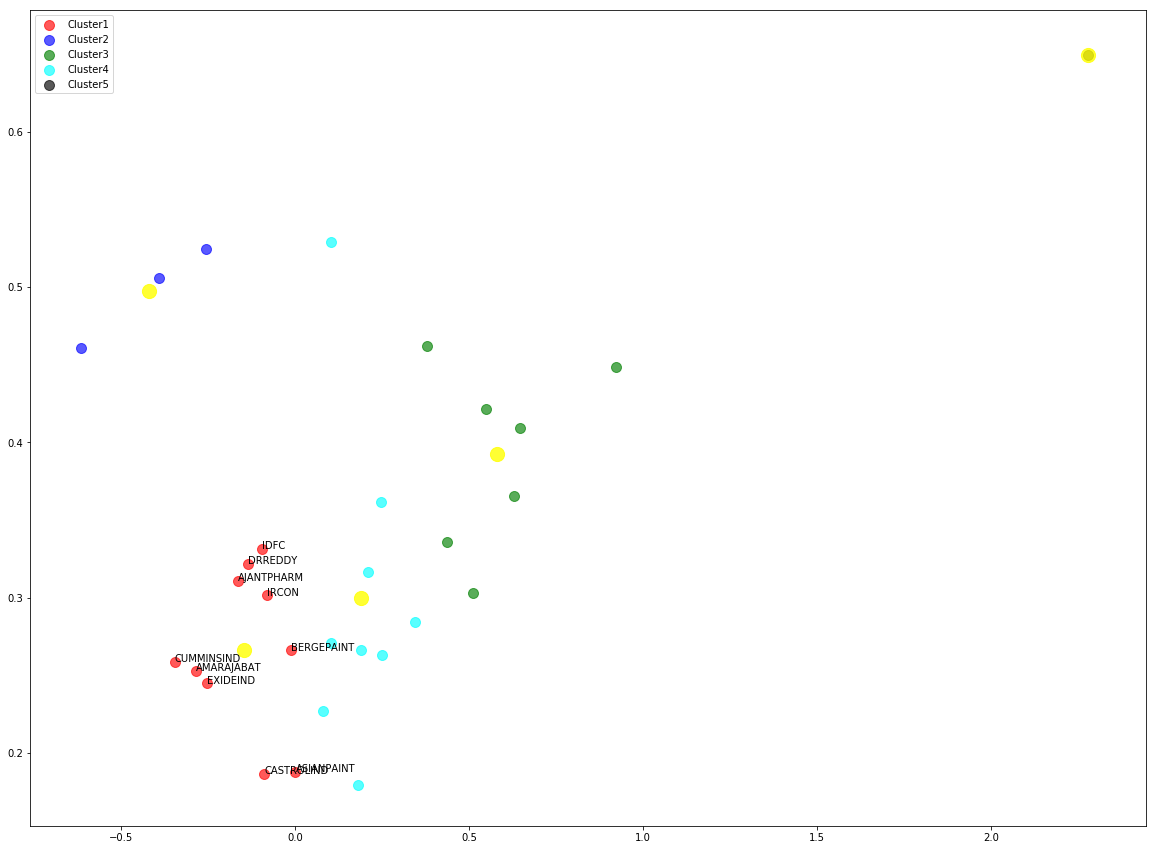

In [84]:
plt.rcParams['figure.figsize'] = (20,15)
figure(figsize=(20,10))

# x = X[idx==0,0]
# y = X[idx==0,1]
# n = df[df['Cluster']==1]['Stock Symbol']

fig, ax1 = plt.subplots()
ax1.scatter(X[idx==0,0], X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
for i, txt in enumerate(df[df['Cluster']==1]['Stock Symbol']):
    ax1.annotate(txt, (X[idx==0,0][i], X[idx==0,1][i]))
    
# plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)

plt.scatter(centroids[:,0], centroids[:,1], s=200, c='yellow', alpha = 0.8)
plt.legend()
plt.show()